In [2]:
# Dependencies
import json
import pandas as pd
import requests
from matplotlib import pyplot as plt 
from config import api_key
from pprint import pprint

In [3]:
rest_data = pd.read_csv('Insp_Comb_clean_1.csv')
rest_data = rest_data.dropna()
rest_data.head()

,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
0,108 Bar N Grill,98.75,10845 NE Halsey St,Portland,97220,4.0,34,108 Bar N Grill,cheap
1,S'Mores Bar,82.00,1126 SW Alder St,Portland,97205,4.5,96,1927 S'mores Company,cheap
2,Taste of Excellence,100.00,1132 SW 19th Ave 101,Portland,97205,4.5,96,1927 S'mores Company,cheap
3,21st Century Pizza,98.00,1221 SW Jefferson St,Portland,97201,4.0,158,21st Century Pizza,cheap
4,"22 Below,",94.50,1728 SW Jefferson St,Portland,97201,4.0,113,22 Below,cheap


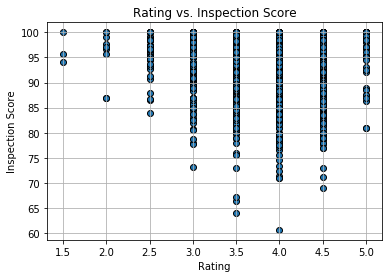

In [68]:
# Build a scatter plot 

plt.scatter(rest_data["Rating"],rest_data["Score"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Rating vs. Inspection Score")
plt.xlabel("Rating")
plt.ylabel("Inspection Score")
#plt.ylim(-5,105)

plt.grid (b=True)
plt.savefig("Rating vs Inspection Score.png")
plt.show()

In [5]:
# Grouping data into price category
cheap_data = rest_data.loc[rest_data["price"] == "cheap"]
moderate_data = rest_data.loc[rest_data["price"] == "Mid"]
expensive_data = rest_data.loc[rest_data["price"] == "Expensive"]

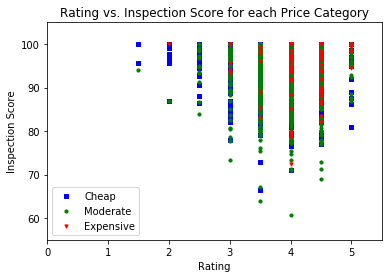

In [69]:
# Build a scatter plot for each data type
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylim([55, 105])
ax1.set_xlim([0,5.5])
ax1.scatter(cheap_data["Rating"],cheap_data["Score"], s=10, c='b', marker="s", label='Cheap')
ax1.scatter(moderate_data["Rating"],moderate_data["Score"], s=10, c='g', marker="o", label='Moderate')
ax1.scatter(expensive_data["Rating"], expensive_data["Score"], s= 10, c='r', marker="v", label='Expensive' )
plt.legend(loc='best')
plt.title("Rating vs. Inspection Score for each Price Category")
plt.xlabel("Rating")
plt.ylabel("Inspection Score")
plt.savefig("Rating vs Inspection Score for each category.png")
plt.show()

In [13]:
price_count = rest_data.groupby('price')['Name'].count()
price_category = price_count.keys()

,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
0,108 Bar N Grill,98.750000,10845 NE Halsey St,Portland,97220,4.0,34,108 Bar N Grill,cheap
1,S'Mores Bar,82.000000,1126 SW Alder St,Portland,97205,4.5,96,1927 S'mores Company,cheap
2,Taste of Excellence,100.000000,1132 SW 19th Ave 101,Portland,97205,4.5,96,1927 S'mores Company,cheap
3,21st Century Pizza,98.000000,1221 SW Jefferson St,Portland,97201,4.0,158,21st Century Pizza,cheap
4,"22 Below,",94.500000,1728 SW Jefferson St,Portland,97201,4.0,113,22 Below,cheap
855,10 Barrel Brewing Company,95.500000,1411 NW Flanders St,Portland,97209,4.0,890,10 Barrel Brewing Portland,Mid
856,Levy Pines Bar,97.000000,1 N Center Court St Ste A,Portland,97227,4.0,890,10 Barrel Brewing Portland,Mid
857,Providence Park-104 2 Towns Cider,97.000000,1844 SW Morrison,Portland,97205,4.0,890,10 Barrel Brewing Portland,Mid
858,Liquor Store,100.000000,3341 SE Belmont St,Portland,97214,4.5,46,11th Avenue Liquor,Mid
859,13 Virtues,91.000000,6410 SE Milwaukie Ave,Portland,97202,3.5,100,13 Virtues Brewing,Mid


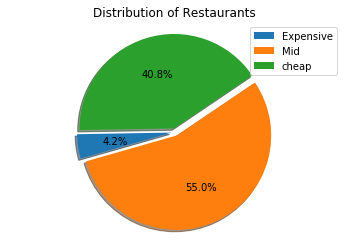

In [67]:
# Generate a pie plot 
explode = (0.04, 0.04, 0.04)
plt.pie(price_count, explode=explode, 
        autopct="%1.1f%%", shadow=True, startangle=181)
plt.axis("equal")
plt.legend(price_category, loc="best")
plt.title("Distribution of Restaurants")
plt.savefig("piechart.png")
plt.show()